# Mental Health in Tech
## IST 718
#### Amanda Austin, Daniel Scott, Phillip Song

In [4]:
# Allow drive to be used, once the link pops up click on the link, allow access and then copy and paste the link
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
# Import packages

import pandas as pd
import json
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import math
from statistics import mean
from google.colab import files
import folium
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image
import pydot
from pydot import graph_from_dot_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# OSMI: Load & Clean the Data

#### osmihelp.org/research

## Individual Years

In [11]:
# Load the survey data as individual dataframes by year

OSMI21 = pd.read_csv('/content/drive/Shared drives/IST 718/OSMI Data/OSMI 2021 Mental Health in Tech Survey Results .csv')
OSMI20 = pd.read_csv('/content/drive/Shared drives/IST 718/OSMI Data/OSMI 2020 Mental Health in Tech Survey Results .csv')
OSMI19 = pd.read_csv('/content/drive/Shared drives/IST 718/OSMI Data/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv')
OSMI18 = pd.read_csv('/content/drive/Shared drives/IST 718/OSMI Data/OSMI Mental Health in Tech Survey 2018.csv')
OSMI17 = pd.read_csv('/content/drive/Shared drives/IST 718/OSMI Data/OSMI Mental Health in Tech Survey 2017.csv')

In [12]:
# Clean the column headers

for i in [OSMI21, OSMI20, OSMI19, OSMI18, OSMI17]:
    i.columns = i.columns.str.replace('[*]', '', regex = True)
    i.columns = i.columns.str.replace('<strong>', '', regex = True)
    i.columns = i.columns.str.replace('</strong>', '', regex = True)
    i.columns = i.columns.str.replace('_', '', regex = True)
    i.columns = i.columns.str.replace('<em>', '', regex = True)
    i.columns = i.columns.str.replace('</em>', '', regex = True)

In [13]:
# Fix column issues specific to 2017 & 2018

OSMI18.columns = OSMI18.columns.str.replace('If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
                                            'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?', regex = True)
OSMI17.columns = OSMI17.columns.str.replace('If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
                                            'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?', regex = True)

OSMI18.columns = OSMI18.columns.str.replace('Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?',
                                            'Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace?', regex = True)
OSMI17.columns = OSMI17.columns.str.replace('Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?',
                                            'Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace?', regex = True)

In [14]:
# Final columns

import csv

with open('/content/drive/Shared drives/IST 718/OSMI Data/FinalColumns.csv', newline='') as f:
    reader = csv.reader(f)
    d = list(reader)

print(d)

[['\ufeffAre you self-employed?'], ['How many employees does your company or organization have?'], ['Is your employer primarily a tech company/organization?'], ['Is your primary role within your company related to tech/IT?'], ['Does your employer provide mental health benefits as part of healthcare coverage?'], ['Do you know the options for mental health care available under your employer-provided health coverage?'], ['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'], ['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'], ['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'], ['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?'], ['Would you feel more comfortable talki

## All Years

### Load

In [20]:
# Load in DF with all years

OSMI = pd.read_csv('/content/drive/Shared drives/IST 718/OSMI Data/OSMI Mental Health in Tech Survey ALL.csv')
OSMI.head()

Are you self-employed?  \
0                      0   
1                      0   
2                      0   
3                      0   
4                      1   

  How many employees does your company or organization have?  \
0                                            100-500           
1                                            100-500           
2                                               6-25           
3                                     More than 1000           
4                                                NaN           

  Is your employer primarily a tech company/organization?  \
0                                                  1        
1                                                  1        
2                                                  1        
3                                                  1        
4                                                NaN        

  Is your primary role within your company related to tech/IT?  \
0                                                  1             
1                                                  1             
2                                                  1             
3                                                  1             
4                                                NaN             

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                 No                                  
1                                                Yes                                  
2                                                NaN                                  
3                                                Yes                                  
4                                                NaN                                  

  Do you know the options for mental health care available under your employer-provided health coverage?  \
0                                                Yes                                                       
1                                                Yes                                                       
2                                                 No                                                       
3                                                Yes                                                       
4                                                NaN                                                       

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                 No                                                                                       
2                                       I don't know                                                                                       
3                                       I don't know                                                                                       
4                                                NaN                                                                                       

  Does your employer offer resources to learn more about mental health disorders and options for seeking help?  \
0                                       I don't know                                                             
1                                                 No                                                             
2                                                 No                                                             
3                                       I don't know                                                             
4                                                NaN                                                 

### Clean

In [25]:
# Normalize responses for better analysis
OSMI = OSMI.replace('TRUE', '1', regex=True)
OSMI = OSMI.replace('FALSE', '0', regex=True)
OSMI = OSMI.replace('Not eligible for coverage / NA', '0', regex=True)
OSMI = OSMI.replace("I don't know", '0', regex=True)
OSMI = OSMI.replace("Don't know", '0', regex=True)
OSMI = OSMI.replace("Don't Know", '0', regex=True)
OSMI = OSMI.replace('Maybe/Not sure', '0', regex=True)
OSMI = OSMI.replace('Maybe', '0.5', regex=True)
OSMI = OSMI.replace('Possibly', '0.5', regex=True)
OSMI = OSMI.replace('N/A', '0', regex=True)
OSMI = OSMI.replace("I've always been self-employed", '0', regex=True)
OSMI = OSMI.replace('Yes, I experienced', '1', regex=True)
OSMI = OSMI.replace('Yes, I observed', '1', regex=True)
OSMI = OSMI.replace('Yes', '1', regex=True)
OSMI = OSMI.replace('No', '0', regex=True)
OSMI = OSMI.replace('0t Applicable', 'Not Applicable', regex=True)

# Fill in NA with 0 where appropriate
OSMI['Does your employer provide mental health benefits as part of healthcare coverage?'].fillna(0, inplace=True)
OSMI['Do you know the options for mental health care available under your employer-provided health coverage?'].fillna(0, inplace=True)
OSMI["Have you ever had a coworker discuss their or another coworker's mental health with you?"].fillna(0, inplace=True)
OSMI['Have you ever been diagnosed with a mental health disorder?'].fillna(0, inplace=True)
OSMI['Have you had a mental health disorder in the past?'].fillna(0, inplace=True)

# Fix company size columnn
OSMI = OSMI.replace('5-Jan', '1-5', regex=True)
OSMI = OSMI.replace('44566', '1-5', regex=True)
OSMI = OSMI.replace('25-Jun', '6-25', regex=True)
OSMI = OSMI.replace('44737', '6-25', regex=True)

# Fill in blank columns with "prefer not to answer" whre appropriate
OSMI['What is your gender?'].fillna('Prefer not to answer', inplace=True)
OSMI['What US state or territory do you live in?'].fillna('Prefer not to answer', inplace=True)
OSMI['What is your race?'].fillna('Prefer not to answer', inplace=True)
OSMI['What US state or territory do you work in?'].fillna('Prefer not to answer', inplace=True)

# Fill in blank columns with "Not Applicable" where appropriate
OSMI['Has being identified as a person with a mental health issue affected your career?'].fillna('Not Applicable', inplace=True)

# Fill in empty cells with average
OSMI['How has it affected your career?'].fillna(OSMI['How has it affected your career?'].mean(), inplace=True)

OSMI.shape

(1577, 50)

In [26]:
# Convert columns with scale/binary to numeric, convert NA to 0
OSMI['Is your employer primarily a tech company/organization?'].fillna(0, inplace=True)
OSMI['Is your employer primarily a tech company/organization?'] = pd.to_numeric(OSMI['Is your employer primarily a tech company/organization?'])
OSMI['Is your primary role within your company related to tech/IT?'].fillna(0, inplace=True)
OSMI['Is your primary role within your company related to tech/IT?'] = pd.to_numeric(OSMI['Is your primary role within your company related to tech/IT?'])
OSMI['Does your employer provide mental health benefits as part of healthcare coverage?'].fillna(0, inplace=True)
OSMI['Does your employer provide mental health benefits as part of healthcare coverage?'] = pd.to_numeric(OSMI['Does your employer provide mental health benefits as part of healthcare coverage?'])
OSMI['Do you know the options for mental health care available under your employer-provided health coverage?'].fillna(0, inplace=True)
OSMI['Do you know the options for mental health care available under your employer-provided health coverage?'] = pd.to_numeric(OSMI['Do you know the options for mental health care available under your employer-provided health coverage?'])
OSMI['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].fillna(0, inplace=True)
OSMI['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'] = pd.to_numeric(OSMI['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'])
OSMI['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'].fillna(0, inplace=True)
OSMI['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'] = pd.to_numeric(OSMI['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'])
OSMI['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].fillna(0, inplace=True)
OSMI['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'] = pd.to_numeric(OSMI['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'])
OSMI['Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'].fillna(0, inplace=True)
OSMI['Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'] = pd.to_numeric(OSMI['Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'])
OSMI['Have you ever discussed your mental health with your employer?'].fillna(0, inplace=True)
OSMI['Have you ever discussed your mental health with your employer?'] = pd.to_numeric(OSMI['Have you ever discussed your mental health with your employer?'])
OSMI['Would you feel comfortable discussing a mental health issue with your coworkers?'].fillna(0, inplace=True)
OSMI['Would you feel comfortable discussing a mental health issue with your coworkers?'] = pd.to_numeric(OSMI['Would you feel comfortable discussing a mental health issue with your coworkers?'])
OSMI['Have you ever discussed your mental health with coworkers?'].fillna(0, inplace=True)
OSMI['Have you ever discussed your mental health with coworkers?'] = pd.to_numeric(OSMI['Have you ever discussed your mental health with coworkers?'])
OSMI["Have you ever had a coworker discuss their or another coworker's mental health with you?"].fillna(0, inplace=True)
OSMI["Have you ever had a coworker discuss their or another coworker's mental health with you?"] = pd.to_numeric(OSMI["Have you ever had a coworker discuss their or another coworker's mental health with you?"])
OSMI['Do you currently have a mental health disorder?'].fillna(0, inplace=True)
OSMI['Do you currently have a mental health disorder?'] = pd.to_numeric(OSMI['Do you currently have a mental health disorder?'])
OSMI["Have you ever been diagnosed with a mental health disorder?"].fillna(0, inplace=True)
OSMI["Have you ever been diagnosed with a mental health disorder?"] = pd.to_numeric(OSMI["Have you ever been diagnosed with a mental health disorder?"])
OSMI["Have you had a mental health disorder in the past?"].fillna(0, inplace=True)
OSMI["Have you had a mental health disorder in the past?"] = pd.to_numeric(OSMI["Have you had a mental health disorder in the past?"])
OSMI["Have you ever sought treatment for a mental health disorder from a mental health professional?"].fillna(0, inplace=True)
OSMI["Have you ever sought treatment for a mental health disorder from a mental health professional?"] = pd.to_numeric(OSMI["Have you ever sought treatment for a mental health disorder from a mental health professional?"])
OSMI["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"].fillna(0, inplace=True)
OSMI["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"] = pd.to_numeric(OSMI["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"])
OSMI["Would you be willing to bring up a physical health issue with a potential employer in an interview?"].fillna(0, inplace=True)
OSMI["Would you be willing to bring up a physical health issue with a potential employer in an interview?"] = pd.to_numeric(OSMI["Would you be willing to bring up a physical health issue with a potential employer in an interview?"])
OSMI["Are you openly identified at work as a person with a mental health issue?"].fillna(0, inplace=True)
OSMI["Are you openly identified at work as a person with a mental health issue?"] = pd.to_numeric(OSMI["Are you openly identified at work as a person with a mental health issue?"])
OSMI["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"].fillna(0, inplace=True)
OSMI["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"] = pd.to_numeric(OSMI["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"])
OSMI["Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace?"].fillna(0, inplace=True)
OSMI["Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace?"] = pd.to_numeric(OSMI["Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace?"])

In [23]:
# Only responses for people who are NOT self employed and drop that column

OSMI = OSMI[OSMI['Are you self-employed?'] == '0']
OSMI = OSMI.drop('Are you self-employed?', 1)
OSMI.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


(1577, 50)

### Review

In [24]:
# Check that only freeform response questions have nulls

OSMI.isnull().sum()

How many employees does your company or organization have?                                                                                                                                0
Is your employer primarily a tech company/organization?                                                                                                                                   0
Is your primary role within your company related to tech/IT?                                                                                                                              0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                         0
Do you know the options for mental health care available under your employer-provided health coverage?                                                                                    0
Has your employer ever formally discussed mental health (for

# Explore the Data

## Overview

In [ ]:
OSMI.describe()

Is your employer primarily a tech company/organization?  \
count                                              1577.000000   
mean                                                  0.726696   
std                                                   0.445797   
min                                                   0.000000   
25%                                                   0.000000   
50%                                                   1.000000   
75%                                                   1.000000   
max                                                   1.000000   

       Is your primary role within your company related to tech/IT?  \
count                                                   1577.000000   
mean                                                       0.927711   
std                                                        0.259048   
min                                                        0.000000   
25%                                                        1.000000   
50%                                                        1.000000   
75%                                                        1.000000   
max                                                        1.000000   

       Does your employer provide mental health benefits as part of healthcare coverage?  \
count                                                                        1577.000000   
mean                                                                            0.541535   
std                                                                             0.498430   
min                                                                             0.000000   
25%                                                                             0.000000   
50%                                                                             1.000000   
75%                                                                             1.000000   
max                                                                             1.000000   

       Do you know the options for mental health care available under your employer-provided health coverage?  \
count                                                                                             1577.000000   
mean                                                                                                 0.415980   
std                                                                                                  0.493046   
min                                                                                                  0.000000   
25%                                                                                                  0.000000   
50%                                                                                                  0.000000   
75%                                                                                                  1.000000   
max                                                                                                  1.000000   

       Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
count                                                                                                                             1577.000000   
mean                                                                                                                                 0.305010   
std                                                                                                                                  0.460558   
min                                                                                                                                  0.000000   
25%                                                                                                                                  0.000000   
50%                                                    

## Correlation Matrix

In [63]:
# Establish response variable

OSMI['Score'] = OSMI['Overall, how much importance does your employer place on mental health?'] + OSMI['Overall, how well do you think the tech industry supports employees with mental health issues?']
OSMI['Score'].describe()

count    1577.000000
mean        7.629677
std         2.994679
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        15.000000
Name: Score, dtype: float64

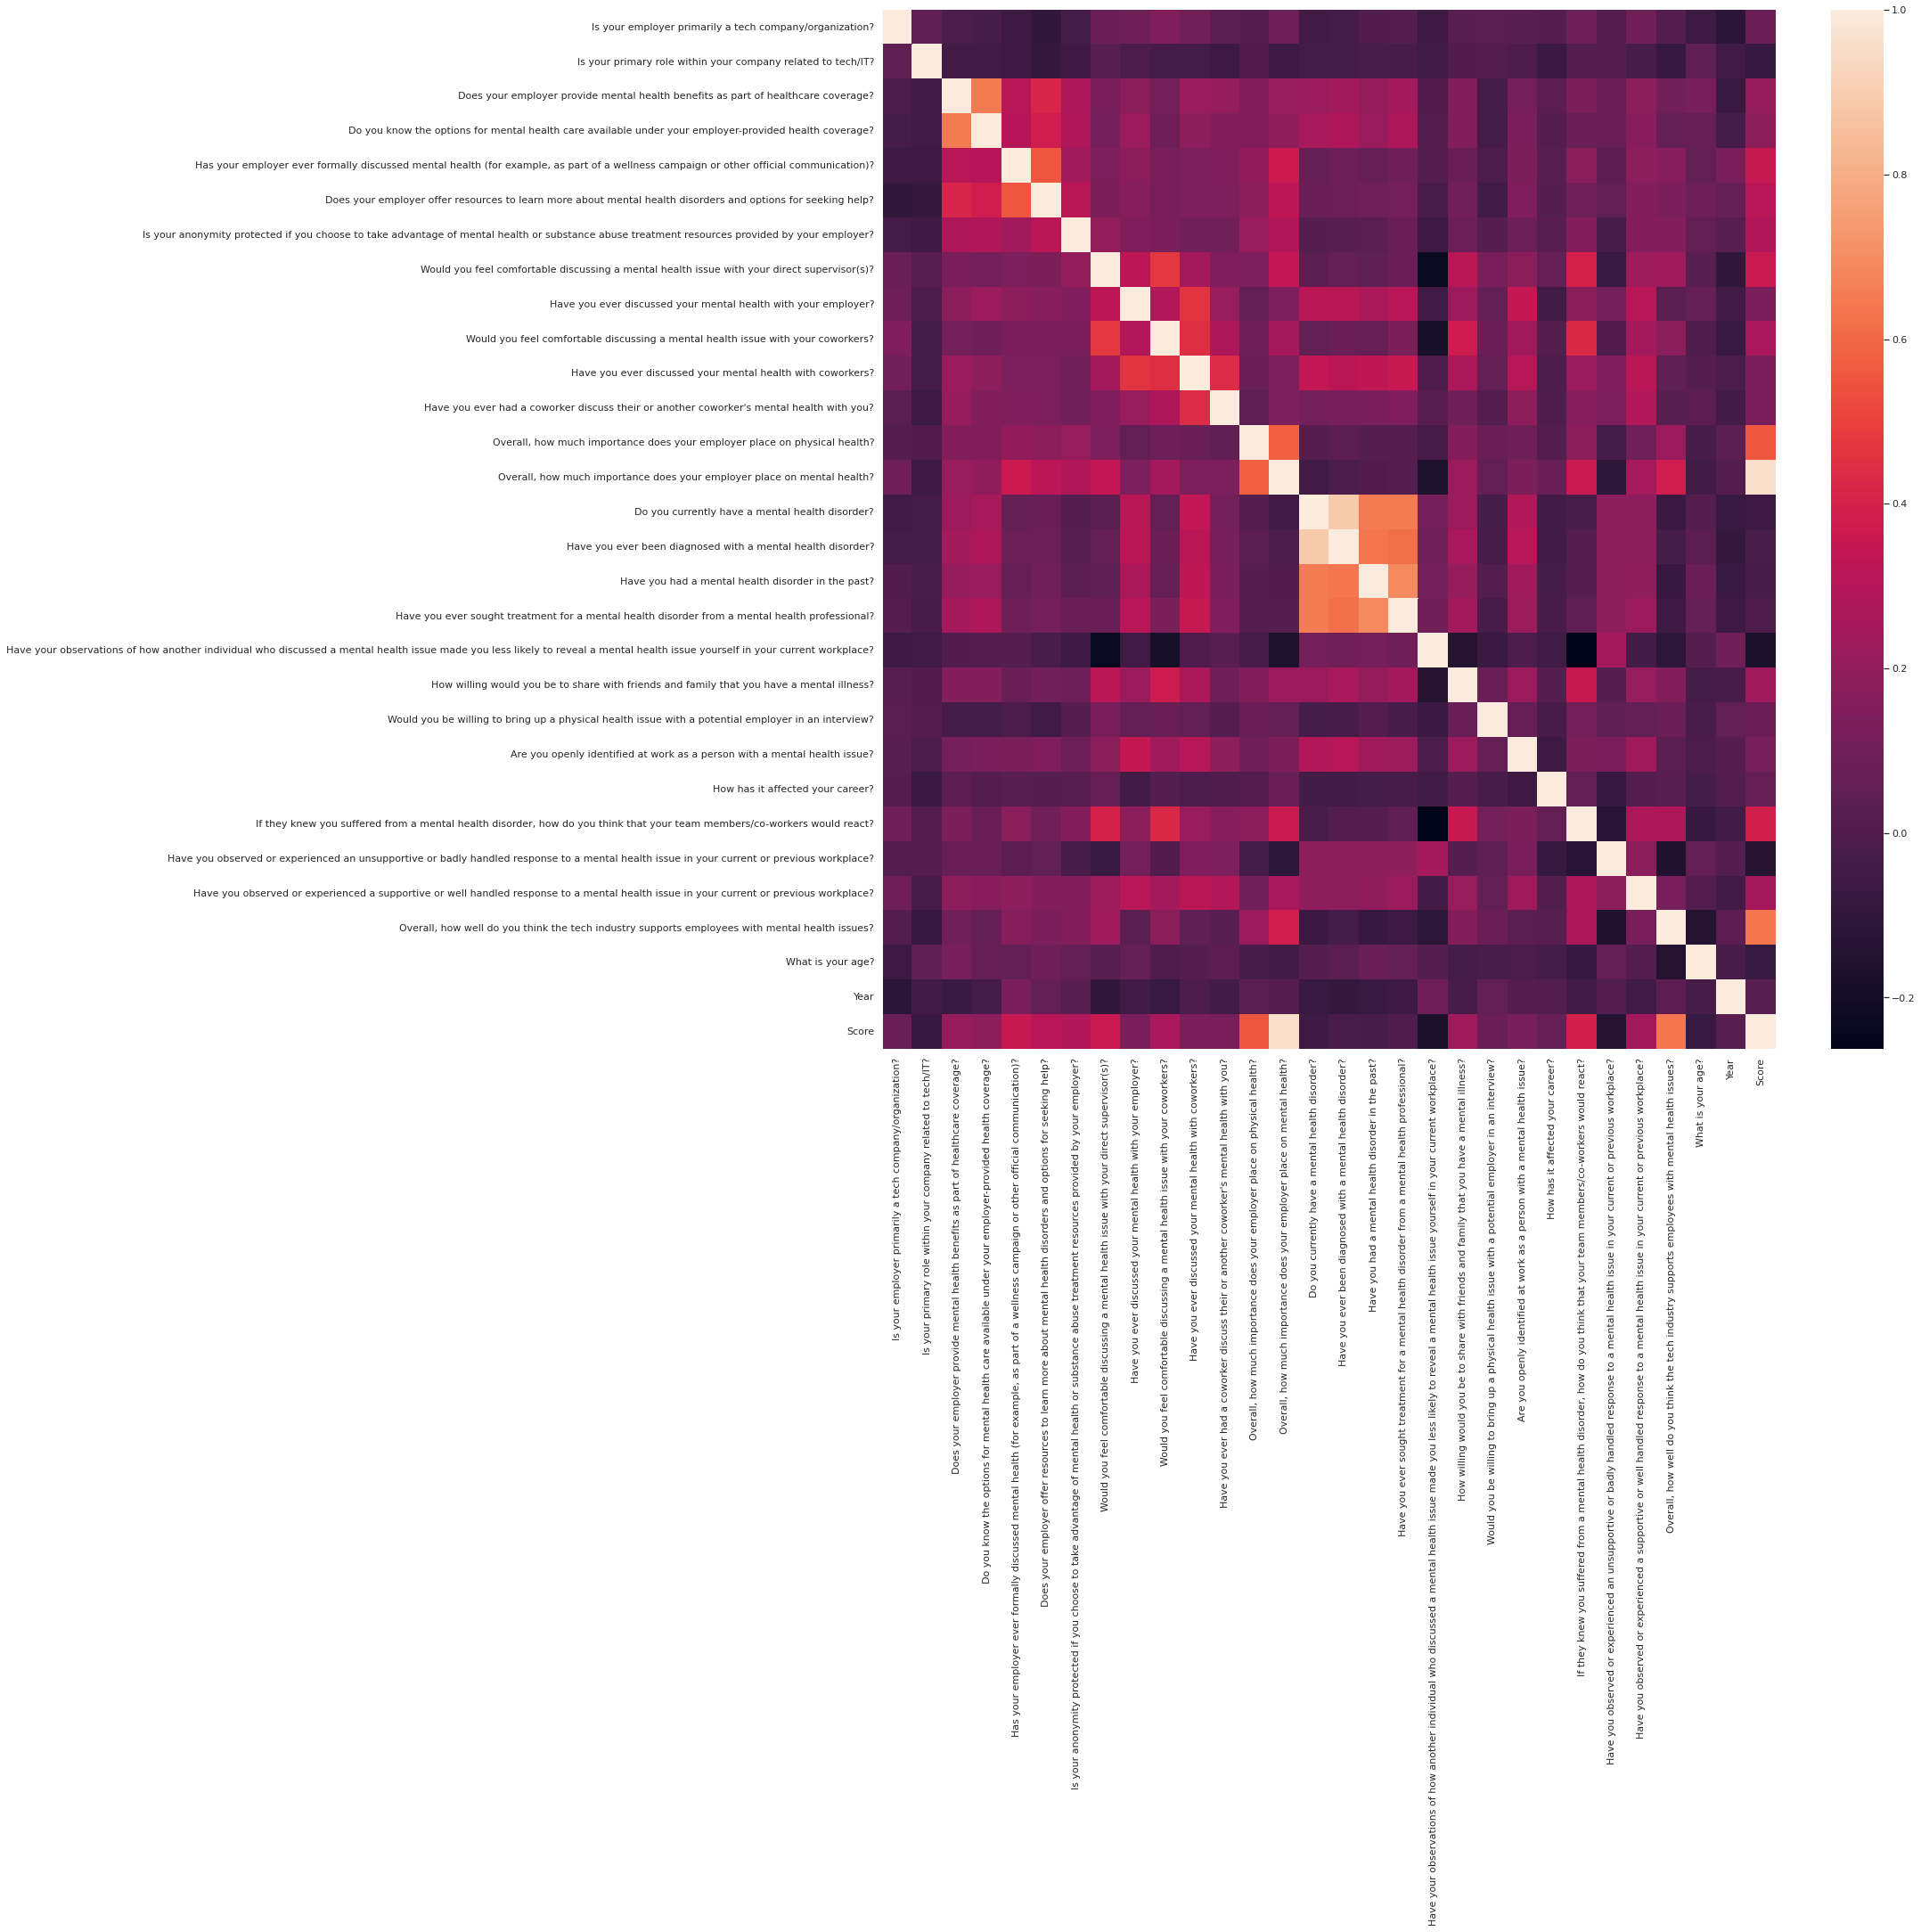

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
corr = OSMI.corr()
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a futur

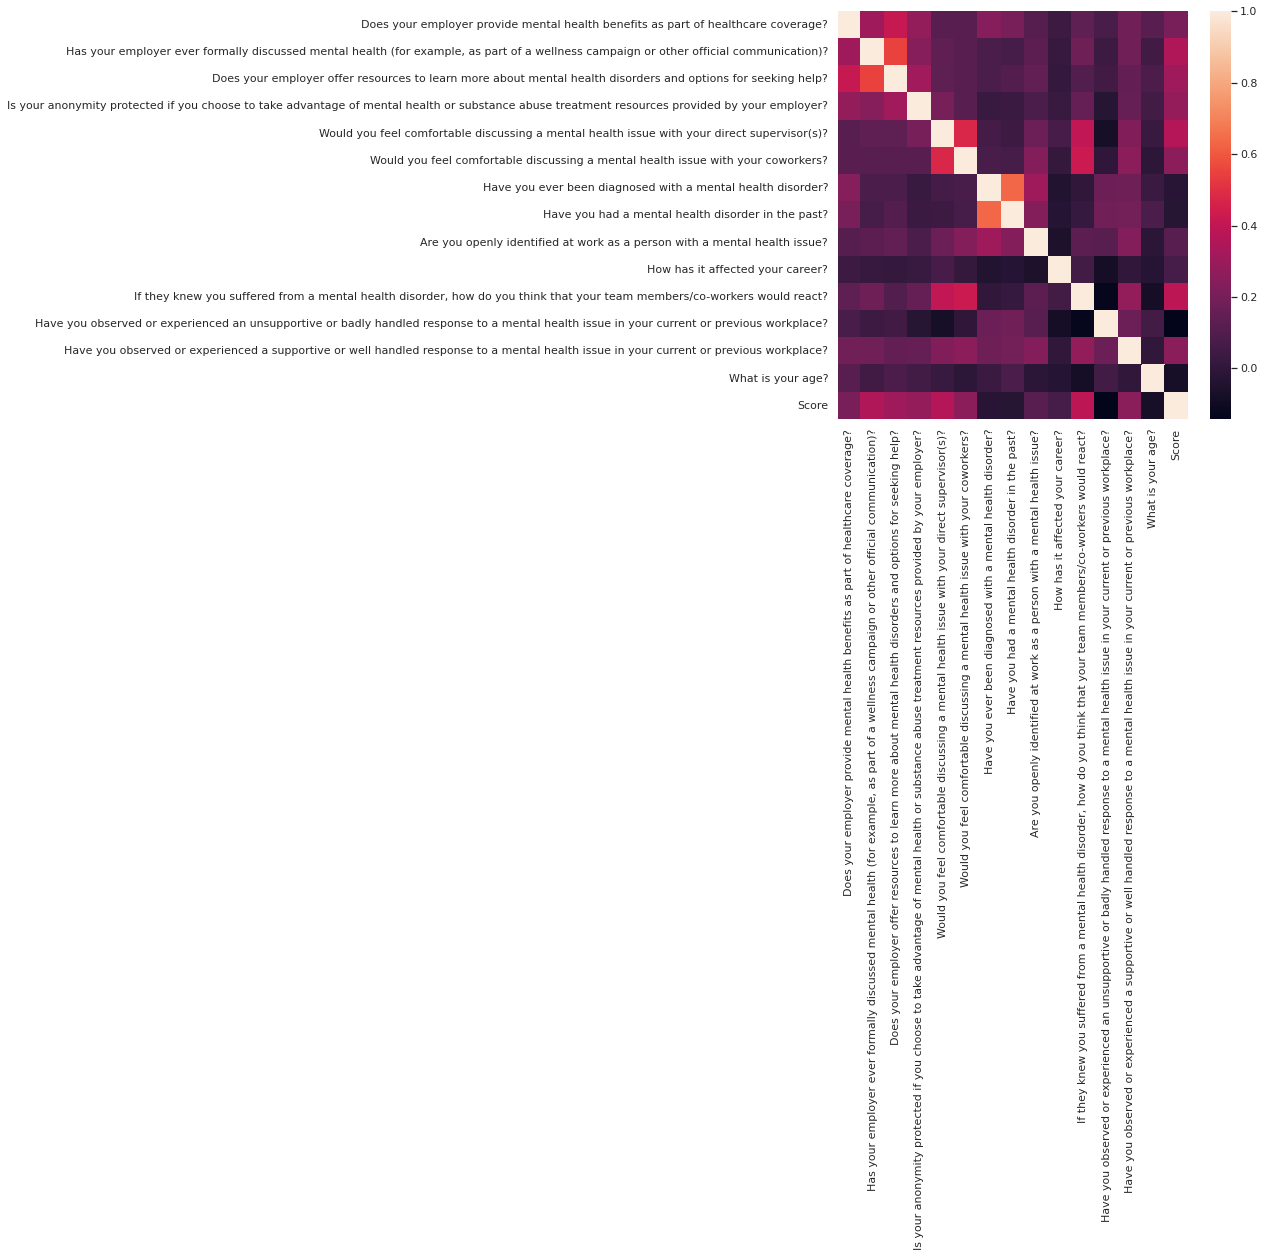

In [ ]:
# Smaller correlation matrix for presentation

temp = OSMI.drop('Overall, how much importance does your employer place on physical health?', 1)
temp = temp.drop('Overall, how much importance does your employer place on mental health?', 1)
temp = temp.drop('Overall, how well do you think the tech industry supports employees with mental health issues?', 1)
temp = temp.drop('Year', 1)
temp = temp.drop('Do you currently have a mental health disorder?', 1)
temp = temp.drop('Have you ever sought treatment for a mental health disorder from a mental health professional?', 1)
temp = temp.drop('Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?', 1)
temp = temp.drop('Is your employer primarily a tech company/organization?', 1)
temp = temp.drop('Is your primary role within your company related to tech/IT?', 1)
temp = temp.drop('Have you ever discussed your mental health with coworkers?', 1)
temp = temp.drop("Have you ever had a coworker discuss their or another coworker's mental health with you?", 1)
temp = temp.drop('Have you ever discussed your mental health with your employer?', 1)
temp = temp.drop('Would you be willing to bring up a physical health issue with a potential employer in an interview?', 1)
temp = temp.drop('How willing would you be to share with friends and family that you have a mental illness?', 1)
temp = temp.drop('Do you know the options for mental health care available under your employer-provided health coverage?', 1)

sns.set(rc={'figure.figsize':(7,7)})
corr = temp.corr()
sns.heatmap(corr)

## Map of Score

### Preparing the Data

In [ ]:
#creating a dataframe for the mapping of the data
my_dataframe = OSMI

#basic map setup
m = folium.Map(location=[48.85, 2.35], tiles = "OpenStreetMap", zoom_start = 3)

world_geo = r'drive/Shared drives/IST 718/world-countries.json'

### Country of Residence

In [ ]:
# Combining the basic map with our dataframe
folium.Choropleth(geo_data = world_geo, data = my_dataframe,
             columns=['What country do you live in?', 'Score'],
             key_on = 'feature.properties.name',
             fill_color = 'Greens', fill_opacity = .75, line_opacity = 0.5,
             legend_name = 'Score').add_to(m)

# Creating the map to be interactive via HTML
m.save('folium_map1.html')

# Displaying the map
m

### Country where individuals work

In [ ]:
# Combining the basic map with our dataframe
folium.Choropleth(geo_data = world_geo, data = my_dataframe,
             columns=['What country do you work in?', 'Score'],
             key_on = 'feature.properties.name',
             fill_color = 'Greens', fill_opacity = .75, line_opacity = 0.5,
             legend_name = 'Score').add_to(m)

# Creating the map to be interactive via HTML
m.save('folium_map2.html')

# Displaying the map
m

## US Respondents Location Distribution

In [44]:
import plotly.graph_objects as go
import plotly.express as px
explrdf = OSMI
explrdf.rename(columns={'What US state or territory do you live in?':'State'}, inplace=True)
explrdf.rename(columns={'What is your age?':'Age'}, inplace=True)
explrdf.rename(columns={'What is your gender?':'Gender'}, inplace=True)


In [28]:
explrdf.rename(columns={'What US state or territory do you live in?':'State'}, inplace=True)

code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [29]:
explrdf['Code'] = explrdf['State'].map(code)

x = explrdf.Code.value_counts().index.tolist()
y = explrdf.Code.value_counts().tolist()

fig = go.Figure(go.Bar(x=x,y=y))

fig.show()

In [43]:
# Survey Respodent Population in USA
fig = px.choropleth(locations=x, locationmode="USA-states", color=y, 
                    scope="usa",
                    color_continuous_scale = 'Blues')

fig.update_layout(
    title_text = '2017-2021 Tech Mental Health Survey Respondents',
    geo_scope='usa', 
)

fig.show()

## Respondents Age

In [45]:

# Assuming employment age range between ages 18-110

agerg = (explrdf.Age >= 18) & (explrdf.Age < 100)

x = explrdf.Age[agerg].value_counts().index.tolist()
y = explrdf.Age[agerg].value_counts().tolist()

fig = go.Figure(
    go.Bar(x=x,y=y),

    )

fig.update_layout(
    title_text = 'Mental Health In Tech Survey Age Distribution (2017-2021)',
    
)




fig.show()

## Respondents Gender

In [56]:
male_pronouns = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 
                 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 
                 'cis male', 'Malr', 'Cis Man', 'cis-male','Ostensibly Male', '']

female_pronouns = ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 
                   'Femake', 'woman', 'Female ', 'cis-female/femme', 'Femile','femalw', 'femmina', 'F, cisgender',
                   'Female (cis)', 'femail', 'Femail-ish', 'cis female', 'F', 'Trans-female', 'Female (trans)', 'Trans woman', 'F, cisgender']

other = [ 'something kinda male?', 'queer/she/they', 
         'non-binary', 'Non-Binary', 'nonbinary', 'Non-binary/Agender', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 
         'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'male leaning androgynous', 
      'Neuter', 'queer', 'Other', 'Non-binary', 'I am a Wookie', 'NB', 'none', 'Genderfluid','gender non-conforming woman','afab non-binary', 'agender',
         'A little about you', 'p', 
         'ostensibly male, unsure what that really means']

# Change the names of some genders
reduced_pronouns = [{p: 'Male' for p in male_pronouns},
                    {p: 'Female' for p in female_pronouns},
                    {p: 'Other' for p in other}]

for p in reduced_pronouns:
  explrdf.Gender = explrdf.Gender.replace(p)

# extract
f = explrdf.loc[explrdf['Gender'] == "Female"]
m = explrdf.loc[explrdf['Gender'] == "Male"]
o = explrdf.loc[explrdf['Gender'] == "Other"]

frames = [f, m, o]

gencom= pd.concat(frames)

In [49]:
from plotly.subplots import make_subplots

In [57]:
x = gencom.Gender.value_counts().index.tolist()
y = gencom.Gender.value_counts().tolist()

fig = make_subplots(rows=1, cols=2)

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]])


pcolors=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

colors = pcolors[:len(x)]

In [58]:
# Bar Graph of Gender Count
fig.add_trace(
    go.Bar(x=x, y=y,
           text=y,
           textposition='auto',
           marker_color=colors,
           showlegend=False), 
    row=1, col=1
)

# Pie Chart Gender Count
fig.add_trace(
    go.Pie(labels=x, values=y,
           marker_colors=colors
           ),
    row=1, col=2
)

# Update Figure Visuals
fig.update_layout(
    height=600, width=800, 
    template="plotly_white",
    title_text="OSMI Survey Gender Count (2017-2021)" # Name of Plot
    )

fig.show()

# Regression

## Prepare the Data

In [ ]:
# Function for regression model
def regression(data, variables):
  y = data['Score']
  x = data[variables]
  x = sm.add_constant(x)
  model = sm.OLS(y, x).fit()
  return model

In [ ]:
# Remove freeform text columns and "are you self employed"

data = OSMI.drop('Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.', 1)
data = data.drop('Describe the conversation with coworkers you had about your mental health including their reactions.', 1)
data = data.drop('Describe the conversation your coworker had with you about their mental health (please do not use names).', 1)
data = data.drop('Why or why not?', 1)
data = data.drop('Why or why not?.1', 1)
data = data.drop('Describe the circumstances of the badly handled or unsupportive response.', 1)
data = data.drop('Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 1)
data = data.drop('If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.', 1)
data = data.drop('Overall, how much importance does your employer place on mental health?', 1)
data = data.drop('Overall, how well do you think the tech industry supports employees with mental health issues?', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a futur

## First Round: All Relevant Data

In [ ]:
# Get explanatory variables
dataDummys = pd.get_dummies(data, drop_first = True)
x = dataDummys.columns

# Convert to list & remove "score" (response variable) and variables that contributed to "score"
x = x.tolist()
x.remove('Score')

In [ ]:
# Split data into test (2017, 2018 2019, 2020) and train (2021)
train = dataDummys[dataDummys['Year'] != 2021]
test = dataDummys[dataDummys['Year'] == 2021]

In [ ]:
pd.set_option('display.max_colwidth', None)
train

Is your employer primarily a tech company/organization?  \
0                                                           1   
1                                                           1   
2                                                           1   
3                                                           1   
5                                                           1   
...                                                       ...   
1700                                                        0   
1701                                                        1   
1702                                                        1   
1703                                                        0   
1704                                                        1   

      Is your primary role within your company related to tech/IT?  \
0                                                                1   
1                                                                1   
2                                                                1   
3                                                                1   
5                                                                0   
...                                                            ...   
1700                                                             1   
1701                                                             1   
1702                                                             1   
1703                                                             1   
1704                                                             1   

      Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                                                     0   
1                                                                                     1   
2                                                                                     0   
3                                                                                     1   
5                                                                                     1   
...                                                                                 ...   
1700                                                                                  0   
1701                                                                                  1   
1702                                                                                  0   
1703                                                                                  1   
1704                                                                                  0   

      Do you know the options for mental health care available under your employer-provided health coverage?  \
0                                                                                                          1   
1                                                                                                          1   
2                                                                                                          0   
3                                                                                                          1   
5                                                                                                          0   
...                                                                                                      ...   
1700                                                                                                       0   
1701                                                                                                       1   
1702                                                                                                       0   
1703                                                                                                       0   
1704                                                       

In [ ]:
# Run the model
OLS = regression(train, x)
print(OLS.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6.717
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          4.42e-125
Time:                        02:58:01   Log-Likelihood:                -2933.5
No. Observations:                1463   AIC:                             6471.
Df Residuals:                    1161   BIC:                             8068.
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                             coef    std err      

## Second Rround: Remove variables with significant amount of responses
#### (i.e. gender, city, and country)

In [ ]:
# Remove variables
data = data.drop('What is your gender?', 1)
data = data.drop('What country do you work in?', 1)
data = data.drop('What country do you live in?', 1)
data = data.drop('What US state or territory do you live in?', 1)
data = data.drop('What US state or territory do you work in?', 1)

# Get explanatory variables
dataDummys = pd.get_dummies(data, drop_first = True)
x = dataDummys.columns

# Convert to list & remove "score" (response variable) and variables that contributed to "score"
x = x.tolist()
x.remove('Score')

# Split data into test (2017, 2018 2019, 2020) and train (2021)
train = dataDummys[dataDummys['Year'] != 2021]
test = dataDummys[dataDummys['Year'] == 2021]

# Run the model
OLS = regression(train, x)
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     28.36
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          2.46e-198
Time:                        02:58:01   Log-Likelihood:                -3090.0
No. Observations:                1463   AIC:                             6302.
Df Residuals:                    1402   BIC:                             6625.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                             coef    std err      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a futur

## Round Three: Remove Variables with P-Value > 0.30

#### Removing variables slowly so we can reeveluate p-values with each iteration
#### Leaving in some multi-response variables since some are significant

In [ ]:
# Remove variables
data = data.drop('Do you know the options for mental health care available under your employer-provided health coverage?', 1)
data = data.drop('Would you feel comfortable discussing a mental health issue with your coworkers?', 1)
data = data.drop('Have you ever discussed your mental health with coworkers?', 1)
data = data.drop("Have you ever had a coworker discuss their or another coworker's mental health with you?", 1)
data = data.drop('Do you currently have a mental health disorder?', 1)
data = data.drop('Have you ever been diagnosed with a mental health disorder?', 1)
data = data.drop('Have you had a mental health disorder in the past?', 1)
data = data.drop('Have you ever sought treatment for a mental health disorder from a mental health professional?', 1)
data = data.drop('Would you be willing to bring up a physical health issue with a potential employer in an interview?', 1)
data = data.drop('Are you openly identified at work as a person with a mental health issue?', 1)
data = data.drop('Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', 1)
data = data.drop('What is your race?', 1)

# Get explanatory variables
dataDummys = pd.get_dummies(data, drop_first = True)
x = dataDummys.columns

# Convert to list & remove "score" (response variable) and variables that contributed to "score"
x = x.tolist()
x.remove('Score')
x.remove('Year')

# Split data into test (2017, 2018 2019, 2020) and train (2021)
train = dataDummys[dataDummys['Year'] != 2021]
test = dataDummys[dataDummys['Year'] == 2021]

# Year is not significant, remove from test & train data
train = train.drop('Year', 1)
test = test.drop('Year', 1)

# Run the model
OLS = regression(train, x)
print(OLS.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a futur

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     44.68
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.50e-212
Time:                        02:58:01   Log-Likelihood:                -3097.0
No. Observations:                1463   AIC:                             6272.
Df Residuals:                    1424   BIC:                             6478.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                             coef    std err      

## Round Four: Remove Variables with P-Value > 0.15

In [ ]:
# Remove variables
data = data.drop('If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 1)
data = data.drop('How willing would you be to share with friends and family that you have a mental illness?', 1)
data = data.drop('How has it affected your career?', 1)
data = data.drop('Has being identified as a person with a mental health issue affected your career?', 1)

# Get explanatory variables
dataDummys = pd.get_dummies(data, drop_first = True)
x = dataDummys.columns

# Convert to list & remove "score" (response variable) and variables that contributed to "score"
x = x.tolist()
x.remove('Score')
x.remove('Year')

# Split data into test (2017, 2018 2019, 2020) and train (2021)
train = dataDummys[dataDummys['Year'] != 2021]
test = dataDummys[dataDummys['Year'] == 2021]

# Year is not significant, remove from test & train data
train = train.drop('Year', 1)
test = test.drop('Year', 1)

# Run the model
OLS = regression(train, x)
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     56.40
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.52e-218
Time:                        02:58:02   Log-Likelihood:                -3100.6
No. Observations:                1463   AIC:                             6263.
Df Residuals:                    1432   BIC:                             6427.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                             coef    std err      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a futu

## Round Five: Remove Values with P-Value > 0.1

In [ ]:
# Remove variables
data = data.drop('If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)?', 1)

# Get explanatory variables
dataDummys = pd.get_dummies(data, drop_first = True)
x = dataDummys.columns

# Convert to list & remove "score" (response variable) and variables that contributed to "score"
x = x.tolist()
x.remove('Score')
x.remove('Year')

# Split data into test (2017, 2018 2019, 2020) and train (2021)
train = dataDummys[dataDummys['Year'] != 2021]
test = dataDummys[dataDummys['Year'] == 2021]

# Year is not significant, remove from test & train data
train = train.drop('Year', 1)
test = test.drop('Year', 1)

# Run the model
OLS = regression(train, x)
print(OLS.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     64.56
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.00e-219
Time:                        02:58:02   Log-Likelihood:                -3104.9
No. Observations:                1463   AIC:                             6264.
Df Residuals:                    1436   BIC:                             6407.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                    coef    std err          t    

## Round Six: Remove Values with P-Value > 0.1

In [ ]:
# Remove variables
data = data.drop('Does your employer provide mental health benefits as part of healthcare coverage?', 1)

# Get explanatory variables
dataDummys = pd.get_dummies(data, drop_first = True)
x = dataDummys.columns

# Convert to list & remove "score" (response variable) and variables that contributed to "score"
x = x.tolist()
x.remove('Score')
x.remove('Year')

# Split data into test (2017, 2018 2019, 2020) and train (2021)
train = dataDummys[dataDummys['Year'] != 2021]
test = dataDummys[dataDummys['Year'] == 2021]

# Year is not significant, remove from test & train data
train = train.drop('Year', 1)
test = test.drop('Year', 1)

# Run the model
OLS = regression(train, x)
print(OLS.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     67.04
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          2.80e-220
Time:                        02:58:02   Log-Likelihood:                -3105.7
No. Observations:                1463   AIC:                             6263.
Df Residuals:                    1437   BIC:                             6401.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                    coef    std err          t    

The model coefficients indicate that questions relating to company policy and culture contribute positively to score.

## Evaluate the Model

In [ ]:
# test set predictions from the model fit to the training set
test['PredictedScore'] = OLS.predict(test)

In [ ]:
# Calculae mean absolute error (MAE)
MAE = mean(abs(test['Score'] - test['PredictedScore']))
MAE

10.58349371250122

The mean absolute error is abouy 10.6, given that our score is on a scale from 0-15, this model is not suitable for forecasting score based off of the question answers.  However, the model is a good indication of factors that contribute to employee's view of how well their employer and their tech inducty focus on mental health.

# Random Forest

## Preparing the Data

In [ ]:
# Create a new dataframe with only numeric variables, remove variables directly contributing to "score" and "are you self employed?"

tree = OSMI.drop('Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.', 1)
tree = tree.drop('Describe the conversation with coworkers you had about your mental health including their reactions.', 1)
tree = tree.drop('Describe the conversation your coworker had with you about their mental health (please do not use names).', 1)
tree = tree.drop('Why or why not?', 1)
tree = tree.drop('Why or why not?.1', 1)
tree = tree.drop('Describe the circumstances of the badly handled or unsupportive response.', 1)
tree = tree.drop('Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 1)
tree = tree.drop('If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.', 1)
tree = tree.drop('Overall, how much importance does your employer place on mental health?', 1)
tree = tree.drop('Overall, how well do you think the tech industry supports employees with mental health issues?', 1)
tree = tree.drop('How many employees does your company or organization have?', 1)
tree = tree.drop('If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 1)
tree = tree.drop('What is your gender?', 1)
tree = tree.drop('What is your race?', 1)
tree = tree.drop('What country do you work in?', 1)
tree = tree.drop('What country do you live in?', 1)
tree = tree.drop('What US state or territory do you live in?', 1)
tree = tree.drop('What US state or territory do you work in?', 1)
tree = tree.drop('If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 1)
tree = tree.drop('If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)?', 1)
tree = tree.drop('Has being identified as a person with a mental health issue affected your career?', 1)
tree = tree.drop('Would you bring up your mental health with a potential employer in an interview?', 1)
tree = tree.drop('Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a futur

In [ ]:
features = pd.get_dummies(tree)
labels = np.array(features['Score'])
features= features.drop('Score', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Split the data set into test and train so we can first run the model with the training set and then determine the accuracy using the testing data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

## Creating Random Forest Model

In [ ]:
# Creating the random forest model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);
# Predictions using the test features
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
# Printing the mean absolute error which can show us how well the model is doing
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Creating the accuracy from the mape
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.63 degrees.
Accuracy: 67.36 %.


Our random forest model did slightly better at predicting than the linear regression

## Importance of Each Variable

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# Importance of each factor 
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Printing each of the variables importance
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Overall, how much importance does your employer place on physical health? Importance: 0.31
Variable: If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react? Importance: 0.09
Variable: What is your age?    Importance: 0.09
Variable: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Importance: 0.07
Variable: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? Importance: 0.06
Variable: How willing would you be to share with friends and family that you have a mental illness? Importance: 0.06
Variable: Does your employer offer resources to learn more about mental health disorders and options for seeking help? Importance: 0.03
Variable: Would you feel comfortable discussing a mental health issue with your coworkers? Importance: 0.03
Variable: Would you be willing to bring up a physical health 

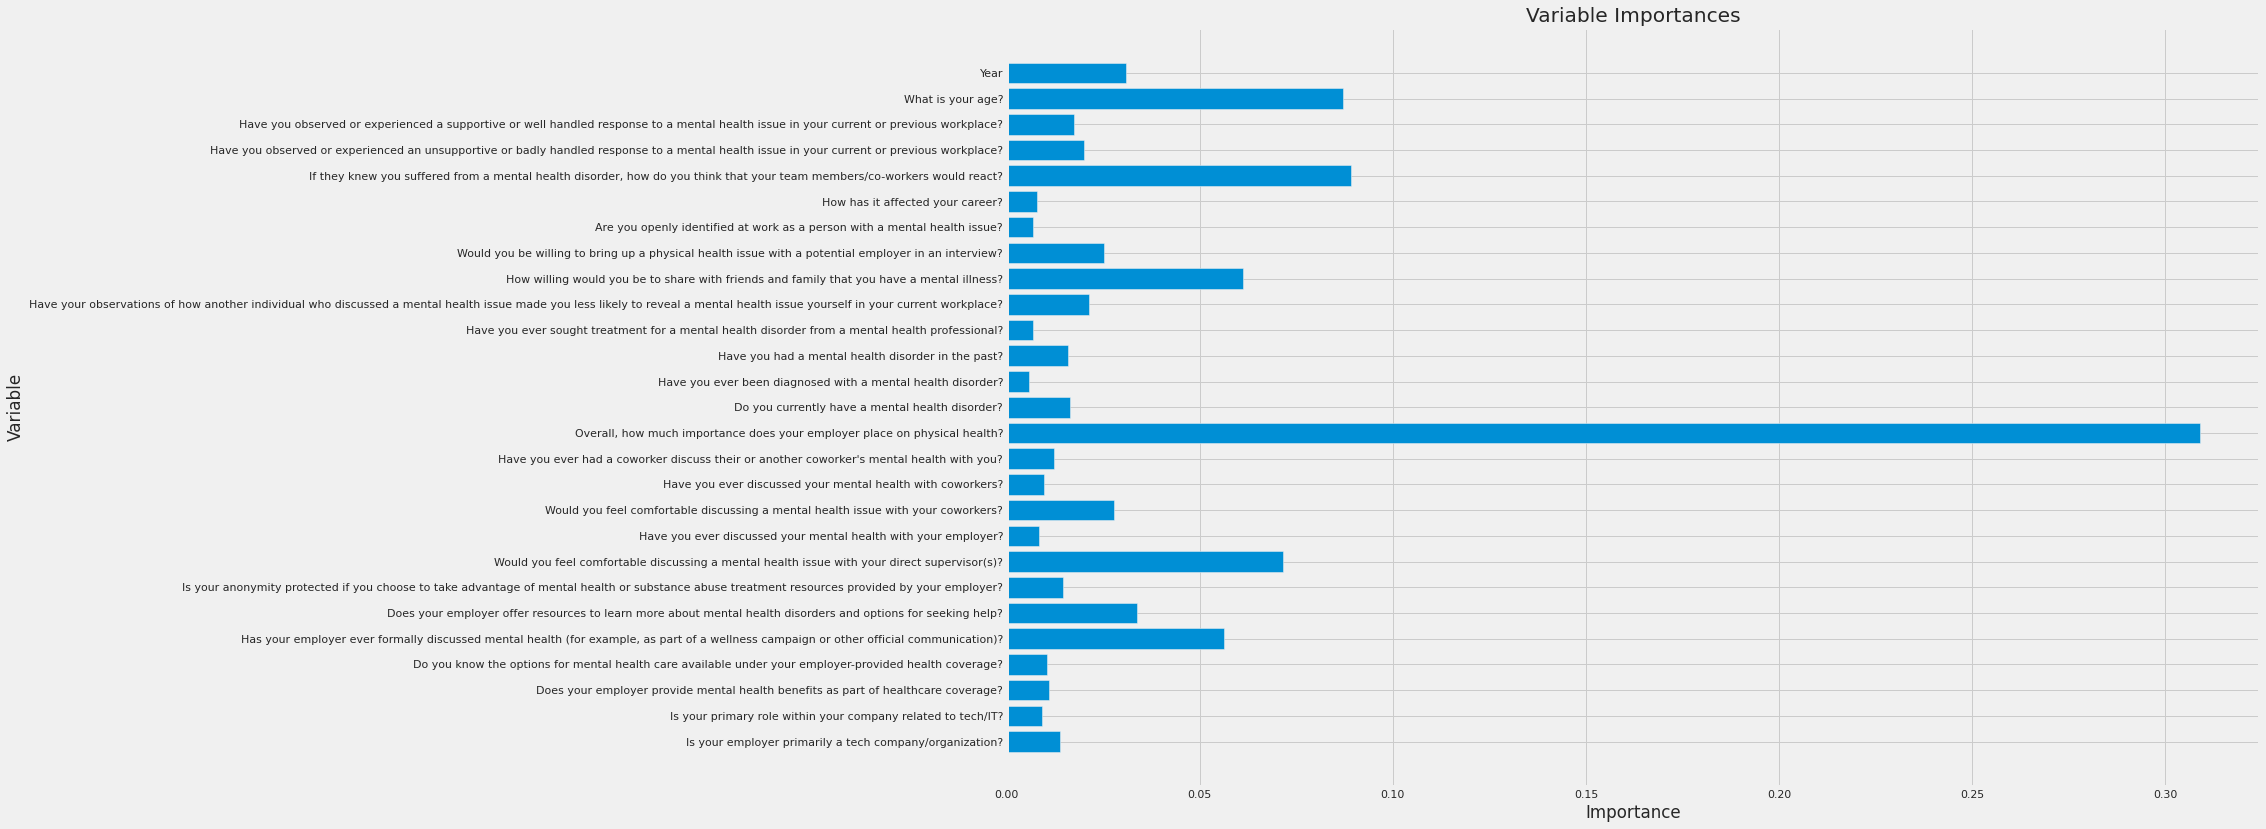

In [ ]:
sns.set(rc={'figure.figsize':(20,13)})
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.barh(x_values, importances)
plt.yticks(x_values, feature_list, rotation = 'horizontal')
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

## Decision Trees

In [ ]:
# Import tools needed for visualization

tree = rf.estimators_[5]

# Create a large 5 level decision tree, the tree is printed to a file called tree png
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Create a smaller tree with only three levels that is a bit more readable and print it to a file called small_tree.png
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')


# Twitter Data

## Retrieving Tweets

In [ ]:
maxTweets = 10000

# Creating a list of the search terms
mylist = ['Depression', 'Anxiety', 'MentalHealth']

In [ ]:
# Setting up a loop to create a CSV for each search term, then scrape the search term from twitter and add it to respective CSV
for term in mylist:
 csvFile = open(f'{term}.csv', 'a', newline='', encoding='utf8')
 csvWriter = csv.writer(csvFile)
 # Creating the headers inside each csv file
 csvWriter.writerow(['id','date','tweet',])
 # Scrape code with limitation usage, no links, no replies, and specific timeframe
 for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'keywords:#{term} + since:2017-01-01 until:2021-12-26-filter:links -filter:replies').get_items()):
  if i > maxTweets :
   break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

## Sentiment Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


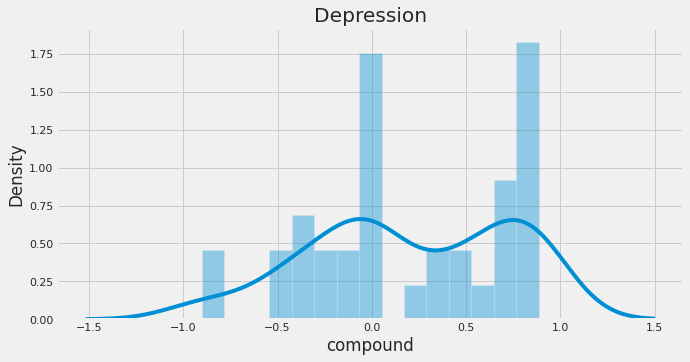

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


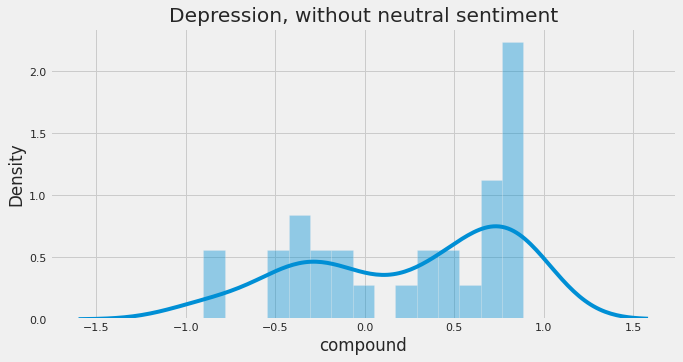

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


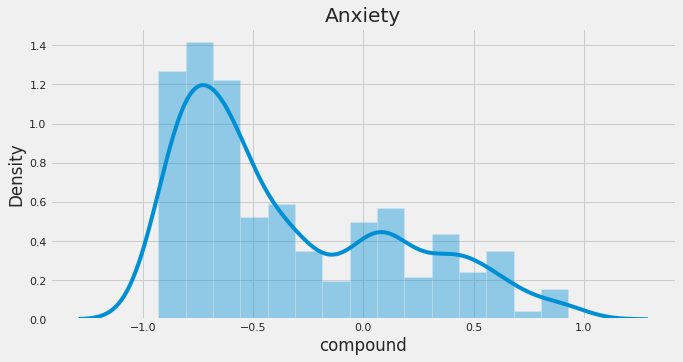

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


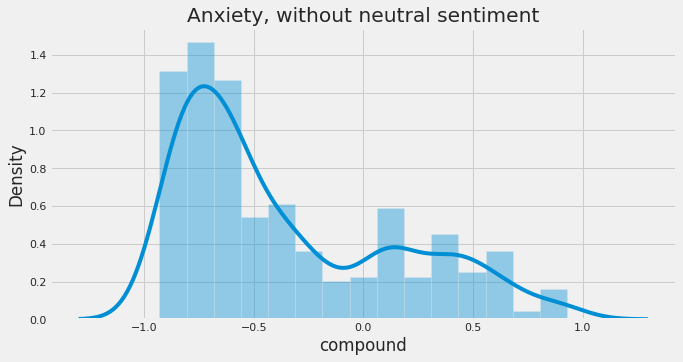

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


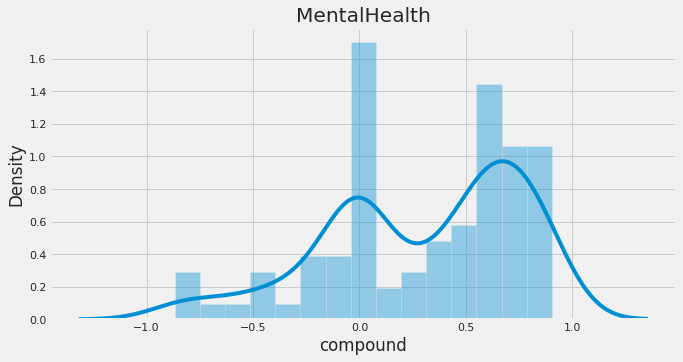

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


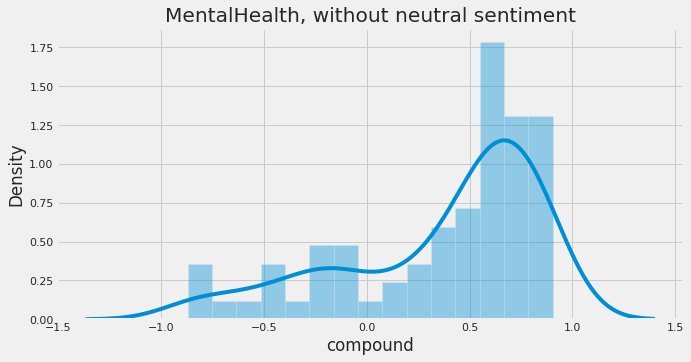

In [ ]:
# Setting up a loop to create a sentiment analysis for each country created, then creating a plot based on such
for term in mylist:
 tweet_df = pd.read_csv(f'{term}.csv')
 # Using sentiment intensity analyzer to show the sentement of each tweet
 analyzer = SentimentIntensityAnalyzer()
 # Setting up the sentement so that there is a polarity score
 sentiment = tweet_df['tweet'].apply(lambda x: analyzer.polarity_scores(x))
 # Once the sentement has been determined adding the column to the current df
 df = pd.concat([tweet_df,sentiment.apply(pd.Series)],1)
 # Creating a plot using plt figure, the sentiment analysis created positive, negative, neutral and compound
 fig = plt.figure(figsize=(10,5))
 ax = fig.add_subplot(111)
 sns.distplot(df['compound'], bins=15, ax=ax)
 plt.title(f'{term}')
 plt.show()
 # Creating a new dataframe without the neutral sentiment to show whether or not the data is more positive or negative
 df_new = df[df.compound != 0]
 # Create a plot with plt figure
 fig = plt.figure(figsize=(10,5))
 ax = fig.add_subplot(111)
 sns.distplot(df_new['compound'], bins=15, ax=ax)
 plt.title(f'{term}, without neutral sentiment')
 plt.show()

While mental health and depression sentiment is mostly neutral or positive, anxiety has a negative sentiment.  Perhaps this speaks to the stigma around mental health lessening, but people still struggle with anxiety and learning how to cope.

## Word Clouds

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x1440 with 0 Axes>

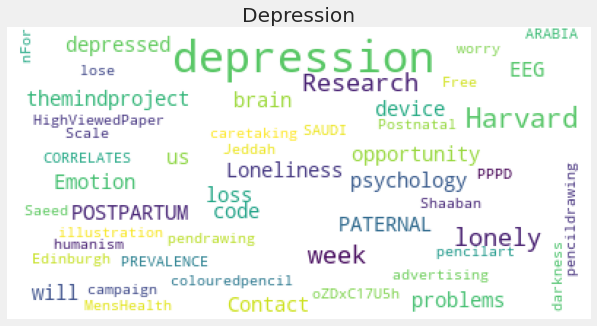

<Figure size 1440x1440 with 0 Axes>

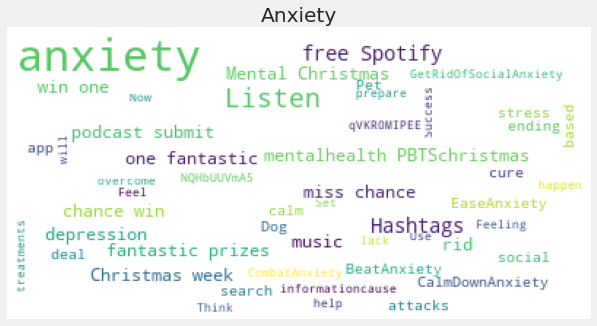

<Figure size 1440x1440 with 0 Axes>

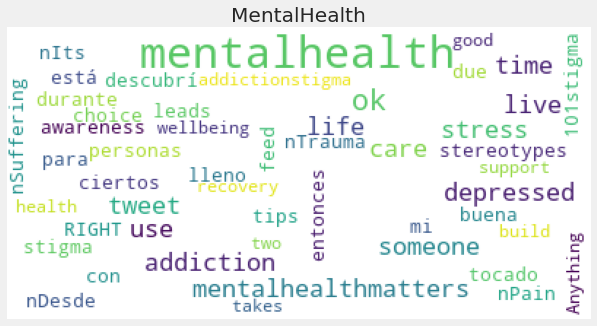

In [ ]:
#Word cloud

TwitterStopwords = ['https', 'nhttps', 'keywords', 'nKeywords', 'dysf', 'Explosi', 'di', 'gr', 'gutbrai', 'li', 'mp3', 'spo', 'tum',
                    'Los', 'que', 'Uno', 'Th', 'colm', 'mejores', 'nSu', 'dtype', "Don'", 'nPlace', 'co', 'edu', 'cvweBybXbQ', 'TMP32',
                    'nInterested', 'vrijzinnig', '6pm', 'GMT', 'toaNsQ9Cap', 'en', 'mutear', 'de', 'Twitter', 'vibra', 'lleno' 'mi',
                    'es', 'ha', 'muy', 'nRecomiendo', 'sencillo', 'XfliRqr17i', 'amp', 'et', 'al', 'temas', 'nNot'] + list(STOPWORDS)

for term in mylist:
 tweet_df = pd.read_csv(f'{term}.csv')
 # Remove numbers
 def no_number_preprocessor(tokens):
     r = re.sub('(\d)+', 'NUM', tokens.lower())
     return r
 for t in (tweet_df['tweet']): #loop through each of the tweets
   no_num_t = no_number_preprocessor(t)
 cv = CountVectorizer(input='content', preprocessor=no_number_preprocessor)
 dtm = cv.fit_transform(tweet_df['tweet'])
 cv_vocab = cv.get_feature_names()
 # Create the wordcloud
 wordcloud = WordCloud(
                         background_color = 'white',
                         stopwords = TwitterStopwords,
                         max_words = 50,
                         max_font_size = 30, 
                         random_state = 42
                         ).generate(str(tweet_df['tweet']))
 # Print out the word cloud
 fig = plt.figure(1)
 plt.figure(figsize=(10,5))
 plt.imshow(wordcloud)
 plt.axis('off')
 plt.title(f'{term}')
 plt.show()

# Survey Data: Word Cloud

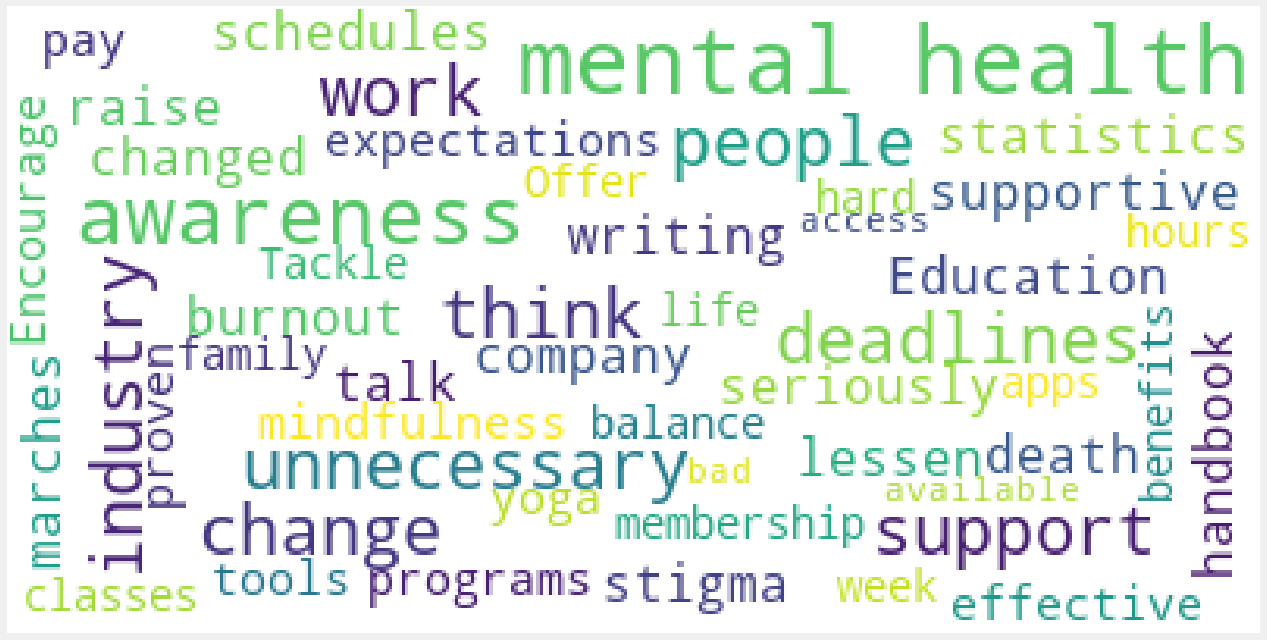

In [ ]:
SurveyStopwords = ['NaN', 'let', 'object', 'Name', 'makes', 'take', 'know', 'use', 'folks', 'add', 'less', 'seems', 'dtype', 'etc'] + list(STOPWORDS)

wordcloud = WordCloud(
    
    background_color = "rgba(255, 255, 255, 0)",
    stopwords = SurveyStopwords,
    max_words = 50,
    max_font_size = 30,
    random_state = 42
    ).generate(str(OSMI['Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']))

# Print out the word cloud
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Three main categories of words:

*   Iniatitives & Culture: Awareness, Support, Marches, Progams, Stigma
*   Being over worked: Burnout, Deadlines, Raise, Hours



# Survey Score Analysis

We looked at how the respondents mental health score changed over time. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(6.0, 10.0)

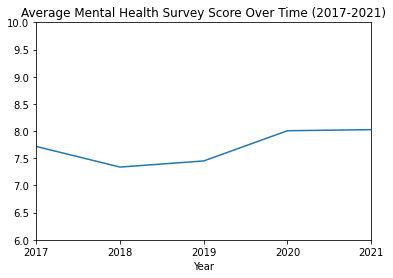

In [69]:
import datetime

tdf = OSMI[['Year', 'Score']]
tdf['Year'] = pd.to_datetime(tdf['Year'], format='%Y')
tdf = tdf.set_index('Year')
allplt = tdf.groupby(['Year'])['Score'].mean()

#Time series of survey score
allplt.plot();
plt.title("Average Mental Health Survey Score Over Time (2017-2021)")
plt.ylim([6, 10])

We also specifically compared the scores of those who had mental health benefits as part of coverage vs those who did not.

In [73]:
withoutcov = OSMI[OSMI['Does your employer provide mental health benefits as part of healthcare coverage?'] == 0]
withoutcov['Year'] = pd.to_datetime(withoutcov['Year'], format='%Y')
withoutcov = withoutcov[['Year', 'Score']]
withoutcovplot = withoutcov.groupby(['Year'])['Score'].mean()


withcov = OSMI[OSMI['Does your employer provide mental health benefits as part of healthcare coverage?'] == 1]
withcov['Year'] = pd.to_datetime(withcov['Year'], format='%Y')
withcov = withcov[['Year', 'Score']]
withcovplot = withcov.groupby(['Year'])['Score'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(6.0, 10.0)

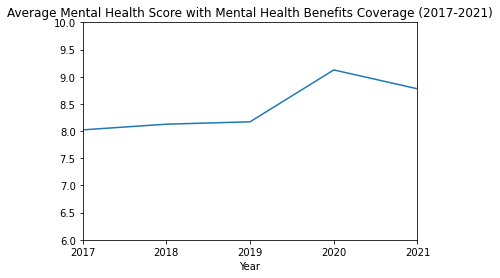

In [74]:
withcovplot.plot();
plt.title("Average Mental Health Score with Mental Health Benefits Coverage (2017-2021)")
plt.ylim([6, 10])

(6.0, 10.0)

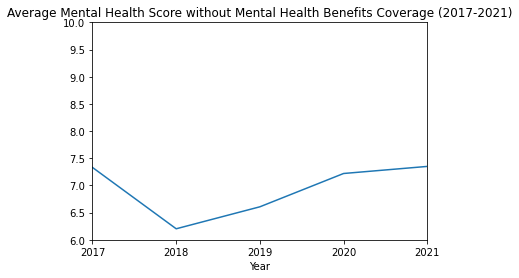

In [75]:
withoutcovplot.plot();
plt.title("Average Mental Health Score without Mental Health Benefits Coverage (2017-2021)")
plt.ylim([6, 10])

# Recommendation



*   Establish policy that does not put barriers in front of employees with mental health issues
*   Provide mental health care as a part of health insurance, additional resources, and opportunities for further education
*   Have consistent, clear communication surrounding mental health, especially during stressful times of the year
*   Foster a workplace culture that does not stigmatize mental health
*   Continue mental health initiatives brought on by COVID-19 and the lockdown





